## Generación de estímulo visual MTF

(Empecé haciendo la explicación en colab, pero me di cuenta que era ineficiente, por lo que a la mitad cambié a latex, una disculpa.)

Para generar esta función de manera adecuada primero va a ser necesario obtener dos valores a partir de la siguiente ecuación:

f(x) = sen(phi(x))

donde

phi(x) = beta * e^(alfa * x)

tal que

phi'(pi) = 2^n  los pixeles de nuestra imagen. (Consideraremos n=9, i.e., 512 pixeles), y phi(0) = 1

Entonces consideremos el siguiente desarrollo algebraico para conseguir los valroes de alfa y beta:

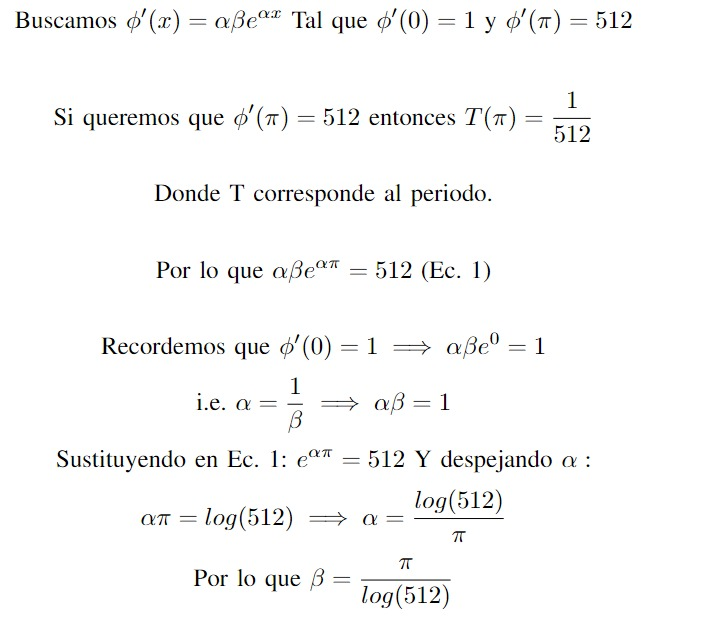



In [18]:
# Intento bueno definiendo la función de manera conjunta.

# Trabajemos con la función f(x, y) = g(y)h(x) donde
# g(y) = e^{-cy}, h(x) = sen(ae^{bx})
# Donde a = pi/ln(512), b = ln(512)/pi
import numpy as np
import math

def funchida(x, y):
    a = (math.pi) / (math.log(512))
    b = (math.log(512)) / (math.pi)
    c = 1

    h = np.sin(a * np.exp(b * x))
    g = np.exp(c * y)

    return h * g

  # Más fácil que hacer toda la modelación por separado la verdad.

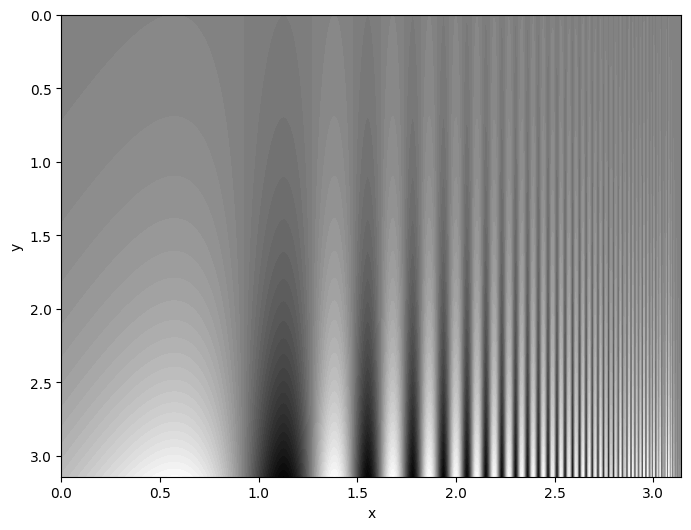

In [25]:
#Graficamos la función usando matplotlib

import matplotlib.pyplot as plt

# Valores a evaluar
x = np.linspace(0, math.pi, 500)
y = np.linspace(0, math.pi, 500)
X, Y = np.meshgrid(x, y)
Z = funchida(X, Y)

# Usamos un heatmap gris para que quede como lo visto en clase.
plt.figure(figsize=(8, 6))
#Azul igual queda coqueto.
#plt.contourf(X, Y, Z, 50, cmap='Blues')
plt.contourf(X, Y, Z, 50, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
#Algo hice raro que me salía la gráfica invertida, pero al cambiar el orden ya quedó todo bien.
plt.ylim(max(y), min(y))
plt.show()

## Intentos previos (están mal)

In [1]:
# Con este intento traté de hacer todo el modelo matemático de manera independiente para ver qué salía.

import math

def alpha(a, b):
  """
  a = distancia entre los objetos a medir (d)
  b = distancia del objeto con el ojo (D)
  """
  return math.atan(a/b)

# x in [0, 2^n]
def h(x, aux, aux1):
  """
  La primera función definida a partir de el valor alpha()
  """
  a = 1
  #b = 1
  b = alpha(aux, aux1)
  phi = a*math.exp(b*x)
  mtf = math.sin(phi)
  return mtf


# y in [0, 2^n]
def g(y):
  """
  La función g a multiplicar con h.
  """
  k = 1
  return math.exp(-3*k*y)

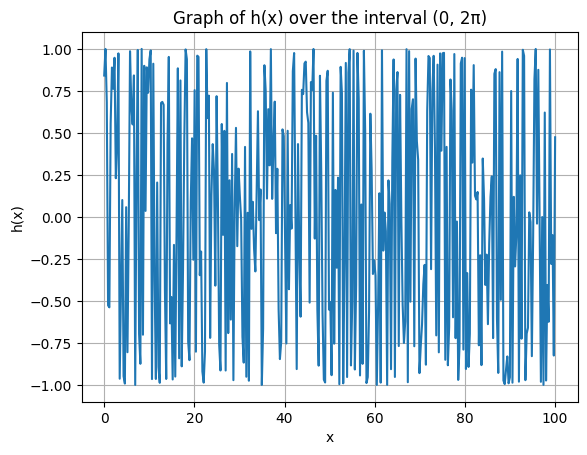

In [ ]:
# Graficación del primer intento.

import numpy as np
import matplotlib.pyplot as plt

#Definición del interavlo de evaluación usando numpy.
x_values = np.linspace(0, 100, 350)
h_vectorized = np.vectorize(h)
y_values = h_vectorized(x_values, 3, 0.15)


#Generación de la gráfica. (No quedó como esperaba)
plt.plot(x_values, y_values)
plt.xlabel('x')
plt.ylabel('h(x)')
plt.title('h(x) en el intervalo (0, 2π)')

plt.grid(True)
plt.show()